In [37]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import networkx.convert_matrix

from node2vec import Node2Vec

C:\Users\bbb50\anaconda3\envs\graph\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
    train_link = train[train.label == 1].loc[:,['to', 'from']]

    for i in train_link.index:
        t = train_link.loc[i]['to']
        f = train_link.loc[i]['from']
        if t > f :
            train_link.loc[i]['to'] = f
            train_link.loc[i]['from'] = t

    train_link = train_link.sort_values(by='to')
    train_link = train_link[~train_link.duplicated()] # -> with duplicated edge exists
    train_link.index = range(train_link.shape[0])

In [30]:
def pre(train, content):
    
    
    content.rename(columns={ content.columns[0]: "id" }, inplace=True)
    contentArray = content.values
    contentArray_sort = contentArray[contentArray[:,0].argsort()]
    contentArray_sort = pd.DataFrame(contentArray_sort)

    unconnected_pairs = []
    matrix =np.zeros( (contentArray_sort.shape[0], contentArray_sort.shape[0]) )
    
    for index,row in train.iterrows():
        if row[3]==1:
            x = row[1]
            y = row[2]
            matrix[x, y] = 1
            matrix[y, x] = 1
        else:
            x = row[1]
            y = row[2]
            matrix[x, y] = 0
            matrix[y, x] = 0

    return np.asmatrix(matrix), contentArray_sort


In [32]:
train1 = pd.read_csv('train_1.csv')
content1 = pd.read_csv('content_1.csv', delimiter='\t',header=None)
train1_adj, content1_p = pre(train1, content1)

In [33]:
G1 = nx.from_numpy_array(train1_adj)

In [38]:
# Generate walks
m1 = Node2Vec(G1, dimensions=100, walk_length=20, num_walks=100)

# train node2vec model
node_embd1 = m1.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.32s/it]


In [47]:
str_fea1 = []
for i in range(train1_adj.shape[0]):
    str_fea1.append(node_embd1.wv[str(i)])

In [65]:
pd.DataFrame(str_fea1).to_csv('str_fea1.csv', index=False)

In [54]:
train2 = pd.read_csv('train_2.csv')
content2 = pd.read_csv('content_2.csv', delimiter='\t',header=None)
train2_adj, content2_p = pre(train2, content2)
G2 = nx.from_numpy_array(train2_adj)

# Generate walks
m2 = Node2Vec(G2, dimensions=100, walk_length=20, num_walks=100)

# train node2vec model
node_embd2 = m2.fit(window=10, min_count=1)

str_fea2 = []
for i in range(train2_adj.shape[0]):
    str_fea2.append(node_embd2.wv[str(i)])

Computing transition probabilities:   0%|          | 0/3312 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [02:26<00:00,  1.46s/it]


In [66]:
pd.DataFrame(str_fea2).to_csv('str_fea2.csv', index=False)

In [62]:
train3 = pd.read_csv('train_3.csv')
content3 = pd.read_csv('content_3.csv', delimiter='\t',header=None)
train3_adj, content3_p = pre(train3, content3)
G3 = nx.from_numpy_array(train3_adj)

# Generate walks
m3 = Node2Vec(G3, dimensions=100, walk_length=20, num_walks=100)

# train node2vec model
node_embd3 = m3.fit(window=10, min_count=1)

str_fea3 = []
for i in range(train3_adj.shape[0]):
    str_fea3.append(node_embd3.wv[str(i)])

Computing transition probabilities:   0%|          | 0/877 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.42it/s]


In [67]:
pd.DataFrame(str_fea3).to_csv('str_fea3.csv', index=False)

In [73]:
content1_p.drop(0, axis=1).to_csv('n_fea1.csv', index=False)

In [72]:
content2_p.drop(0, axis=1).to_csv('n_fea2.csv', index=False)

In [74]:
content3_p.drop(0, axis=1).to_csv('n_fea3.csv', index=False)

In [242]:
node_list = np.arange(len(GG.nodes()))

In [264]:
initial_node_count = len(GG.nodes)

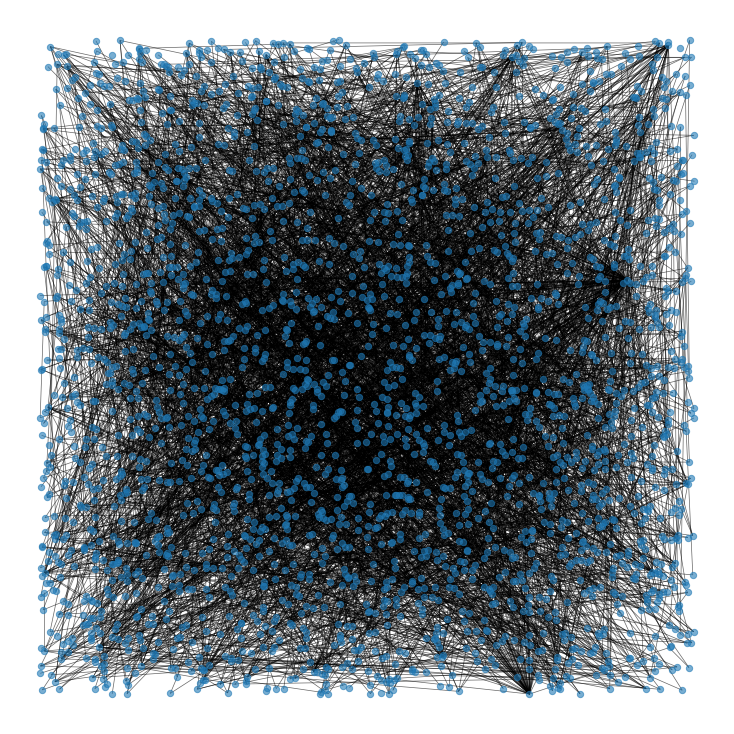

In [281]:
plt.figure(figsize=(10,10))

pos = nx.random_layout(GG, seed=23)
nx.draw(GG, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [266]:
gel

,source,target
0,0,563
1,1,962
2,3,139
3,3,913
4,3,2179
...,...,...
4231,2591,2706
4232,2593,2643
4233,2610,2614
4234,2621,2638
